In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
energy_by_src_df = pd.read_csv('our_world_in_data/primary-energy-consumption-by-source-and-region.csv')
long_energy_df = pd.read_csv('our_world_in_data/global-primary-energy-consumption.csv')

In [3]:
display(energy_by_src_df.head(5))
display(long_energy_df.head(5))

,Entity,Code,Year,Oil (tWh),Gas (tWh),Coal (tWh),Nuclear (tWh),Hydropower (tWh),Other renewables (tWh)
0,Africa,NaN,1965,316.777300,10.552653,335.590757,0.0,37.575804,0.0
1,Africa,NaN,1966,347.368863,11.788922,331.371978,0.0,41.181708,0.0
2,Africa,NaN,1967,344.129668,11.660342,341.010827,0.0,42.521929,0.0
3,Africa,NaN,1968,363.142507,11.901662,355.407259,0.0,49.007849,0.0
4,Africa,NaN,1969,368.629932,14.177457,357.506395,0.0,56.797097,0.0


,Entity,Code,Year,Solar (tWh),Other renewables (tWh),Nuclear (tWh),Hydropower (tWh),Natural gas (tWh),Crude oil (tWh),Coal (tWh),Traditional biofuels (tWh),Wind (tWh)
0,World,OWID_WRL,1800,NaN,NaN,NaN,NaN,NaN,NaN,97.22230,5555.555556,NaN
1,World,OWID_WRL,1810,NaN,NaN,NaN,NaN,NaN,NaN,127.77788,5833.333333,NaN
2,World,OWID_WRL,1820,NaN,NaN,NaN,NaN,NaN,NaN,152.77790,6111.111111,NaN
3,World,OWID_WRL,1830,NaN,NaN,NaN,NaN,NaN,NaN,263.88910,6388.888889,NaN
4,World,OWID_WRL,1840,NaN,NaN,NaN,NaN,NaN,NaN,355.55584,6944.444444,NaN


In [4]:
agg_e_by_s_df = energy_by_src_df[pd.isnull(energy_by_src_df['Code'])]
ctry_e_by_s_df = energy_by_src_df[~pd.isnull(energy_by_src_df['Code'])]
ctry_e_by_s_df = ctry_e_by_s_df[ctry_e_by_s_df['Code'] != 'OWID_WRL']
ctry_e_by_s_df['Year'] = pd.to_datetime(arg=ctry_e_by_s_df['Year'], format='%Y')
ctry_e_by_s_df.head(5)

,Entity,Code,Year,Oil (tWh),Gas (tWh),Coal (tWh),Nuclear (tWh),Hydropower (tWh),Other renewables (tWh)
52,Algeria,DZA,1965-01-01,14.99107,8.08285,0.81410,0.0,1.03507,0.0
53,Algeria,DZA,1966-01-01,19.68959,8.39686,0.79084,0.0,0.95366,0.0
54,Algeria,DZA,1967-01-01,18.35214,8.14100,0.60476,0.0,1.06996,0.0
55,Algeria,DZA,1968-01-01,19.56166,8.55968,0.63965,0.0,1.46538,0.0
56,Algeria,DZA,1969-01-01,20.64325,11.25784,0.81410,0.0,0.95366,0.0


In [5]:

# tmp = ctry_e_by_s_df.pivot(index='Code', columns='Year', values='Oil (tWh)')
# world_e_by_s_df = ctry_e_by_s_df[ctry_e_by_s_df['Code'] == 'OWID_WRL']

# tmp

In [6]:
ctry_indexed = ctry_e_by_s_df.set_index(['Code','Year'])
ctry_indexed
almost_right = ctry_e_by_s_df.pivot(index='Code', columns='Year').stack().T
# almost_right.reset_index().set_index(['Code','Year'])
almost_right
# tmp = ctry_e_by_s_df.pivot(index='Code', columns='Year').reset_index()
# tmp.melt(col_level=0, id_vars='Code', value_vars = ['Oil (terrawatt-hours)', 'Gas (terrawatt-hours)', 'Coal (terawatt-hours)',
#                        'Nuclear (terrawatt-hours)', 'Hydropower (terrawatt-hours)',
#                        'Other renewables (terrawatt-hours)'])
# ctry_e_by_s_df.pivot(index='Code', columns='Year').reset_index()
# tmp.melt(col_level=0, id_vars='Code')

Code                                     ARE                        \
Year                              1965-01-01            1966-01-01   
Entity                  United Arab Emirates  United Arab Emirates   
Oil (tWh)                           0.819587              0.878249   
Gas (tWh)                                  0                     0   
Coal (tWh)                                 0                     0   
Nuclear (tWh)                              0                     0   
Hydropower (tWh)                           0                     0   
Other renewables (tWh)                     0                     0   

Code                                                                \
Year                              1967-01-01            1968-01-01   
Entity                  United Arab Emirates  United Arab Emirates   
Oil (tWh)                           0.948241               1.06118   
Gas (tWh)                            4.75667                6.2802   
Coal (tWh)                                 0                     0   
Nuclear (tWh)                              0                     0   
Hydropower (tWh)                           0                     0   
Other renewables (tWh)                     0                     0   

Code                                                                \
Year                              1969-01-01            1970-01-01   
Entity                  United Arab Emirates  United Arab Emirates   
Oil (tWh)                            1.17591               1.35668   
Gas (tWh)                            6.17553               8.79228   
Coal (tWh)                                 0                     0   
Nuclear (tWh)                              0                     0   
Hydropower (tWh)                           0                     0   
Other renewables (tWh)                     0                     0   

Code                                                                \
Year                              1971-01-01            1972-01-01   
Entity                  United Arab Emirates  United Arab Emirates   
Oil (tWh)                            1.58168               2.08177   
Gas (tWh)                            13.9211               14.4445   
Coal (tWh)                                 0                     0   
Nuclear (tWh)                              0                     0   
Hydropower (tWh)                           0                     0   
Other renewables (tWh)                     0                     0   

Code                                                                \
Year                              1973-01-01            1974-01-01   
Entity                  United Arab Emirates  United Arab Emirates   
Oil (tWh)                             3.2564               4.51244   
Gas (tWh)                            18.1079               18.8406   
Coal (tWh)                                 0                     0   
Nuclear (tWh)                              0                     0   
Hydropower (tWh)                           0                     0   
Other renewables (tWh)                     0                     0   

Code                        ...                ZAF                \
Year                        ...         2007-01-01    2008-01-01   
Entity                      ...       South Africa  South Africa   
Oil (tWh)                   ...            299.685       284.093   
Gas (tWh)                   ...            36.5966       39.1435   
Coal (tWh)                  ...            972.977        1085.5   
Nuclear (tWh)               ...            29.7816       34.2211   
Hydropower (tWh)            ...            2.28421       3.16579   
Other renewables (tWh)      ...           0.805821      0.840032   

Code                                                              \
Year                      2009-01-01    2010-01-01    2011-01-01   
Entity                  South Africa  South Africa  South Africa   
Oil (tWh)                   

In [7]:
# ctry_e_by_s_json = {}
# # ctry_e_by_s_df.groupby(['Code'], axis=1)
# for i in 
# help(pd.DataFrame.pivot_table)
ctry_piv_df = ctry_e_by_s_df.pivot_table(index=['Entity','Code','Year'])
year_piv_df = ctry_e_by_s_df.pivot_table(index=['Year'])
display(year_piv_df.head(5))

long_year_piv = long_energy_df.pivot_table(index=['Year'])
display(long_year_piv.head(5))

,Coal (tWh),Gas (tWh),Hydropower (tWh),Nuclear (tWh),Oil (tWh),Other renewables (tWh)
Year,,,,,,
1965-01-01,266.922483,111.588862,38.762439,1.131004,290.320426,0.220175
1966-01-01,270.019738,121.394759,41.515616,1.515977,312.674197,0.270395
1967-01-01,265.632215,130.149029,42.444747,1.858327,335.050036,0.281798
1968-01-01,269.396422,141.695667,44.505498,2.302855,364.199881,0.317719
1969-01-01,277.800957,155.418209,47.024845,2.780165,395.615988,0.347061


,Coal (tWh),Crude oil (tWh),Hydropower (tWh),Natural gas (tWh),Nuclear (tWh),Other renewables (tWh),Solar (tWh),Traditional biofuels (tWh),Wind (tWh)
Year,,,,,,,,,
1800,97.22230,NaN,NaN,NaN,NaN,NaN,NaN,5555.555556,NaN
1810,127.77788,NaN,NaN,NaN,NaN,NaN,NaN,5833.333333,NaN
1820,152.77790,NaN,NaN,NaN,NaN,NaN,NaN,6111.111111,NaN
1830,263.88910,NaN,NaN,NaN,NaN,NaN,NaN,6388.888889,NaN
1840,355.55584,NaN,NaN,NaN,NaN,NaN,NaN,6944.444444,NaN


Index(['Coal (tWh)', 'Gas (tWh)', 'Hydropower (tWh)', 'Nuclear (tWh)',
       'Oil (tWh)', 'Other renewables (tWh)'],
      dtype='object')

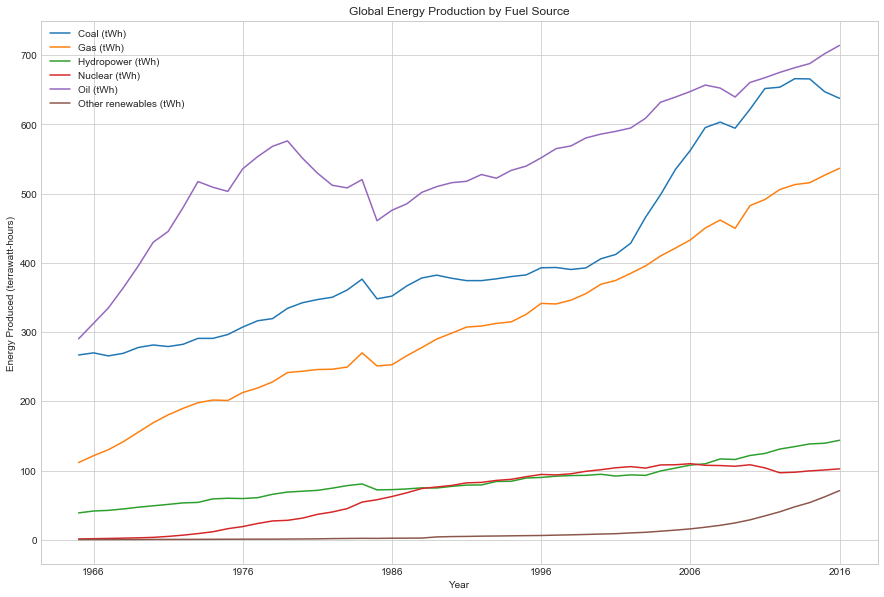

In [8]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.plot(year_piv_df['Coal (tWh)'])
ax.plot(year_piv_df['Gas (tWh)'])
ax.plot(year_piv_df['Hydropower (tWh)'])
ax.plot(year_piv_df['Nuclear (tWh)'])
ax.plot(year_piv_df['Oil (tWh)'])
ax.plot(year_piv_df['Other renewables (tWh)'])
ax.set_xlabel('Year')
ax.set_ylabel('Energy Produced (terrawatt-hours)')
ax.set_title('Global Energy Production by Fuel Source')
ax.legend()
year_piv_df.columns


Index(['Coal (tWh)', 'Gas (tWh)', 'Hydropower (tWh)', 'Nuclear (tWh)',
       'Oil (tWh)', 'Other renewables (tWh)'],
      dtype='object')

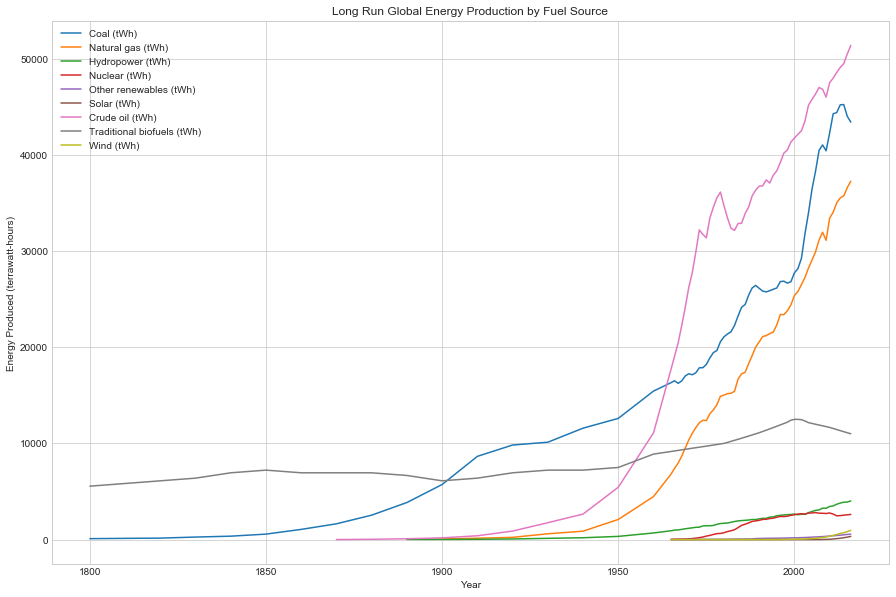

In [9]:
long_energy_df.columns
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.plot(long_year_piv['Coal (tWh)'])
ax.plot(long_year_piv['Natural gas (tWh)'])
ax.plot(long_year_piv['Hydropower (tWh)'])
ax.plot(long_year_piv['Nuclear (tWh)'])
# ax.plot(long_year_piv['Oil (tWh)'])
ax.plot(long_year_piv['Other renewables (tWh)'])
ax.plot(long_year_piv['Solar (tWh)'])
ax.plot(long_year_piv['Crude oil (tWh)'])
ax.plot(long_year_piv['Traditional biofuels (tWh)'])
ax.plot(long_year_piv['Wind (tWh)'])
ax.set_xlabel('Year')
ax.set_ylabel('Energy Produced (terrawatt-hours)')
ax.set_title('Long Run Global Energy Production by Fuel Source')
ax.legend()
year_piv_df.columns


In [15]:
pd.set_option('display.width', 150)

Energy conversion:
Our charts show energy production in units of terrawatt-hours, which is a measure of power per time, specifically  $10^9$ watts for 1 hour. 
$1 W = 1 \frac{J}{s}$
$1 tWh = 10^9 W \times 1 hr = 10^9 \frac{J}{s} \times 1 hr \times 3600 \frac{s}{hr} = 3.6*10^{12} J$


Fuel Sources:

Every hydrocarbon combustion reaction will have the form:

$C_xH_y + O_2 \rightarrow CO_2 + H_2O$

Coal:
* Bituminous Coal$^{1,2}$: $C_{137}H_{97}O_9NS$, energy released by combustion: $25.0 - 33.4$ MJ/kg   
* Anthracite Coal$^{1,2}$: $C_{240}H_{90}O_4NS$, energy released by combustion: $30.1$ MJ/kg   
* Lignite Coal$^2$: energy released by combustion: $16.1$ MJ/kg

In addition to the standard combustion reaction components above, the other elements will form$^3$ $SO_2$ and $N_2$ or $NO_2$

Balancing the equations for Bituminous and Anthracite Coal (and assuming the nitrogenous biproduct is $N_2$, it doesn't change the $CO_2$ output), we get:

* Bituminous: $4 C_{137}H_{97}O_9NS + 631 O_2 \rightarrow 548 CO_2 + 194 H_2O + 4 SO_2 + 2 N_2 $
* Molar Mass for $C_{137}H_{97}O_9NS$:  $1933.30 \frac{g}{mol}$


* Anthracite: $2 C_{240}H_{90}O_4NS + 523 O_2 \rightarrow 480 CO_2 + 90 H_2O + 2 SO_2 + 1 N_2 $
* Molar Mass for $C_{240}H_{90}O_4NS$:  $3083.35 \frac{g}{mol}$

| Coal Type  | Chemical Formula | Molar Mass $\frac{g}{mol}$ |   Balanced Combustion Equation    |
| ---------- | ---------------- | -------------------------- | --------------------------------- |
| Bituminous |$C_{137}H_{97}O_9NS$| 1933.30 |$4 C_{137}H_{97}O_9NS + 631 O_2 \rightarrow 548 CO_2 + 194 H_2O + 4 SO_2 + 2 N_2 $|
| Anthracite |$C_{240}H_{90}O_4NS$| 3083.35 |$2 C_{240}H_{90}O_4NS + 523 O_2 \rightarrow 480 CO_2 + 90 H_2O + 2 SO_2 + 1 N_2 $|


Gas:



Sources:

- 1: (http://chemed.chem.purdue.edu/genchem/topicreview/bp/1organic/coal.html)
- 2: (https://engineering.dartmouth.edu/~d30345d/books/Numbers/Chap3-Energy.pdf)
- 3: (http://environ.andrew.cmu.edu/m3/s3/09fossil.shtml)

Radius of earth: $6.3781 \times 10^6 m $

CO2 density $\rho_{CO_2} = 1.98 \frac{kg}{m^3}$ (wikipedia)
$O_2$ density $\rho_{O_2} = 1.429 \frac{g}{L} = 0.001429 \frac{kg}{L} = 1.429 \frac{kg}{m^3}$ (wikipedia + math)

So $CO_2$ has a higher density than $O_2$

    
* 1: (https://en.wikipedia.org/wiki/Earth_radius#cite_note-IAU_XXIX-1)
* 2: (http://wordpress.mrreid.org/2014/08/01/the-composition-of-earths-atmosphere-with-elevation/)
* https://ccmc.gsfc.nasa.gov/modelweb/models/nrlmsise00.php

In [44]:
names = ['Height [km]', 'O, cm-3', 'N2, cm-3', 'O2, cm-3','HE, cm-3','Ar, cm-3',
         'H, cm-3','N, cm-3','Anom_O, cm-3', 'F10_7_daily']
atmos_comp = pd.read_table('nasa_msis_atmosphere_composition_data_12_06.txt', header=None, skiprows=37,
                           delim_whitespace=True, names=names, index_col='Height [km]')
# atmos_comp.set_index(names[0])
atmos_comp.drop(['Anom_O, cm-3', 'F10_7_daily'], axis=1, inplace=True)
display(atmos_comp)
# help(pd.DataFrame.drop)

,"O, cm-3","N2, cm-3","O2, cm-3","HE, cm-3","Ar, cm-3","H, cm-3","N, cm-3"
Height [km],,,,,,,
0.0,0.000000e+00,2.053000e+19,5.508000e+18,1.378000e+14,2.456000e+17,0.0,0.0
1.0,0.000000e+00,1.839000e+19,4.932000e+18,1.234000e+14,2.199000e+17,0.0,0.0
2.0,0.000000e+00,1.655000e+19,4.440000e+18,1.111000e+14,1.980000e+17,0.0,0.0
3.0,0.000000e+00,1.494000e+19,4.008000e+18,1.003000e+14,1.787000e+17,0.0,0.0
4.0,0.000000e+00,1.349000e+19,3.619000e+18,9.053000e+13,1.614000e+17,0.0,0.0
5.0,0.000000e+00,1.216000e+19,3.262000e+18,8.160000e+13,1.454000e+17,0.0,0.0
6.0,0.000000e+00,1.092000e+19,2.930000e+18,7.329000e+13,1.306000e+17,0.0,0.0
7.0,0.000000e+00,9.762000e+18,2.619000e+18,6.551000e+13,1.168000e+17,0.0,0.0
8.0,0.000000e+00,8.674000e+18,2.327000e+18,5.821000e+13,1.038000e+17,0.0,0.0


In [49]:
atmos_comp['O, cm-3'].index

Float64Index([  0.0,   1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,   9.0,
              ...
              191.0, 192.0, 193.0, 194.0, 195.0, 196.0, 197.0, 198.0, 199.0, 200.0],
             dtype='float64', name='Height [km]', length=201)

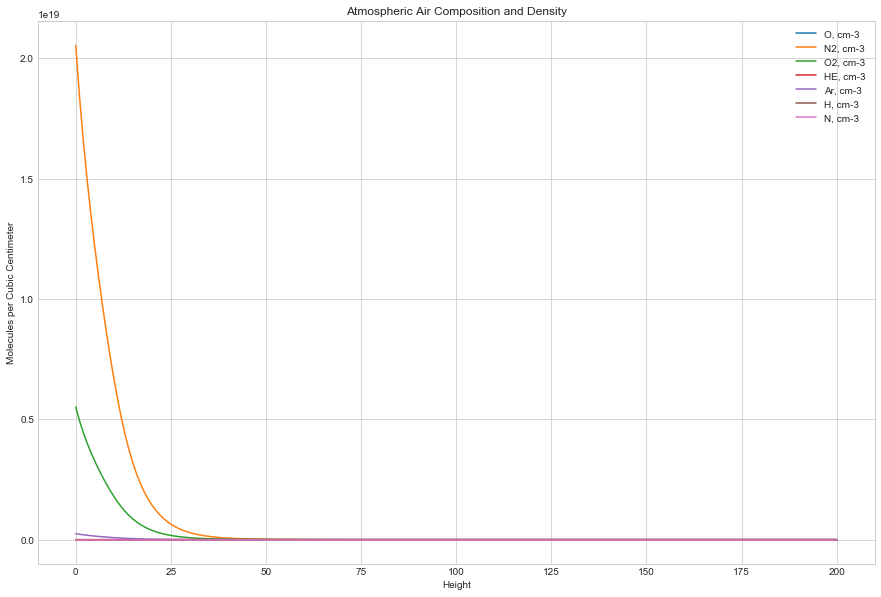

In [63]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
# ax.plot(atmos_comp['O, cm-3'].values, atmos_comp['O, cm-3'].index, label='O, cm-3')
# ax.plot(atmos_comp['N2, cm-3'].values, atmos_comp['N2, cm-3'].index, label='N2, cm-3')
# ax.plot(atmos_comp['O2, cm-3'].values, atmos_comp['O2, cm-3'].index, label='O2, cm-3')
# ax.plot(atmos_comp['HE, cm-3'].values, atmos_comp['HE, cm-3'].index, label='HE, cm-3')
# ax.plot(atmos_comp['Ar, cm-3'].values, atmos_comp['Ar, cm-3'].index, label='Ar, cm-3')
# ax.plot(atmos_comp['H, cm-3'].values, atmos_comp['H, cm-3'].index, label='H, cm-3')
# ax.plot(atmos_comp['N, cm-3'].values, atmos_comp['N, cm-3'].index, label='N, cm-3')
ax.plot(atmos_comp['O, cm-3'])
ax.plot(atmos_comp['N2, cm-3'])
ax.plot(atmos_comp['O2, cm-3'])
ax.plot(atmos_comp[ 'HE, cm-3'])
ax.plot(atmos_comp[ 'Ar, cm-3'])
ax.plot(atmos_comp[ 'H, cm-3'])
ax.plot(atmos_comp[ 'N, cm-3'])
ax.set_xlabel('Height')
ax.set_ylabel('Molecules per Cubic Centimeter')
ax.set_title('Atmospheric Air Composition and Density')
ax.legend()

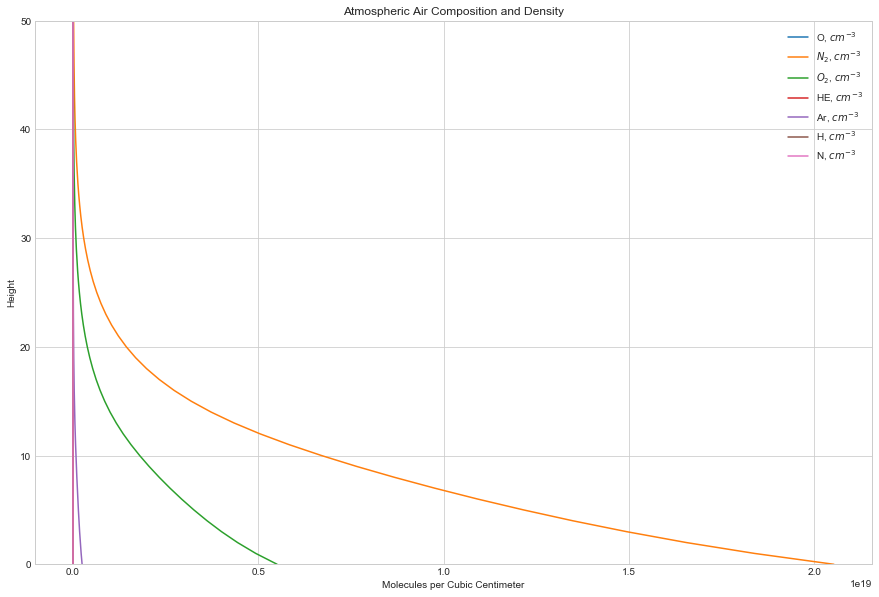

In [68]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.plot(atmos_comp['O, cm-3'].values, atmos_comp['O, cm-3'].index, label='O, $cm^{-3}$')
ax.plot(atmos_comp['N2, cm-3'].values, atmos_comp['N2, cm-3'].index, label='$N_2$, $cm^{-3}$')
ax.plot(atmos_comp['O2, cm-3'].values, atmos_comp['O2, cm-3'].index, label='$O_2$, $cm^{-3}$')
ax.plot(atmos_comp['HE, cm-3'].values, atmos_comp['HE, cm-3'].index, label='HE, $cm^{-3}$')
ax.plot(atmos_comp['Ar, cm-3'].values, atmos_comp['Ar, cm-3'].index, label='Ar, $cm^{-3}$')
ax.plot(atmos_comp['H, cm-3'].values, atmos_comp['H, cm-3'].index, label='H, $cm^{-3}$')
ax.plot(atmos_comp['N, cm-3'].values, atmos_comp['N, cm-3'].index, label='N, $cm^{-3}$')
# ax.plot(atmos_comp['N2, cm-3'])
# ax.plot(atmos_comp['O2, cm-3'])
# ax.plot(atmos_comp[ 'HE, cm-3'])
# ax.plot(atmos_comp[ 'Ar, cm-3'])
# ax.plot(atmos_comp[ 'H, cm-3'])

# ax.plot(atmos_comp[ 'N, cm-3'])
ax.set(ylim=[0, 50])
ax.set_ylabel('Height')
ax.set_xlabel('Molecules per Cubic Centimeter')
ax.set_title('Atmospheric Air Composition and Density')
ax.legend()

From this plot, we can see that $O_2$ and $N_2$ are the most common molecules by far.  

In [13]:
# help(pd.melt)
# help(pd.pivot)
# help(pd.read_csv)
# help(pd.DataFrame.groupby)
# help(pd.DataFrame.drop)
# help(pd.DataFrame)
# help(pd.DataFrame.set_index)
# help(plt.plot)
# help(pd.set_option)
help(pd.core.config)

Help on module pandas.core.config in pandas.core:

NAME
    pandas.core.config

DESCRIPTION
    The config module holds package-wide configurables and provides
    a uniform API for working with them.
    
    Overview
    
    This module supports the following requirements:
    - options are referenced using keys in dot.notation, e.g. "x.y.option - z".
    - keys are case-insensitive.
    - functions should accept partial/regex keys, when unambiguous.
    - options can be registered by modules at import time.
    - options can be registered at init-time (via core.config_init)
    - options have a default value, and (optionally) a description and
      validation function associated with them.
    - options can be deprecated, in which case referencing them
      should produce a warning.
    - deprecated options can optionally be rerouted to a replacement
      so that accessing a deprecated option reroutes to a differently
      named option.
    - options can be reset to their defau

In [13]:
import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'GDP<br>Billions US$'),
      ) ]

layout = dict(
    title = '2014 Global GDP<br>Source:\
            <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [14]:
df

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND
5,Angola,131.40,AGO
6,Anguilla,0.18,AIA
7,Antigua and Barbuda,1.24,ATG
8,Argentina,536.20,ARG
9,Armenia,10.88,ARM
